In [5]:
#installing beautiful soup library for webscrapping
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [4]:
#install the request library
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [7]:
#importing modules beautiful soup and requests 
from bs4 import BeautifulSoup
import requests

In [20]:
#Request module to access the website
source = requests.get('https://www.imdb.com/chart/top/')

In [31]:
#Checking the status of URL whether correct or not
def check_url(url):
    try:
        response = requests.head(url)
        response.raise_for_status()
        print("URL is valid and accessible.")
    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error Connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout Error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

# Example usage
url = 'https://www.flipkart.com/mobile-phones-store'
check_url(url)

URL is valid and accessible.


In [32]:
# Create a BeautifulSoup object to parse the HTML content
soup= BeautifulSoup(source.text,"lxml")

In [33]:
#checking our data with html code generated
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 250 Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/chart/top/" rel="canonical"/>
<meta content="http://www.imdb.com/chart/top/" property="og:url"/>
<script>
    if (typeof uet == 'function') {
      uet("bb", "Loa

In [38]:
#requesting the list of movies from above html code and confirming the list quantity
movies = soup.find('tbody', class_="lister-list").find_all('tr')
print(len(movies))

250


In [43]:
#finding data in tr tag by creating a for loop

for movie in movies:
    
    name = movie.find('td', class_="titleColumn").a.text
    
    print(name)
    break


The Shawshank Redemption


In [45]:
# Now finding the rank of the movies from the html code using strip function to clear the spaces and index to pick only rank
for movie in movies:
    
    name = movie.find('td', class_="titleColumn").a.text
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    
    print(rank)
    break

1


In [46]:
#Extracting the year and using strip to remove the parenthesis

for movie in movies:
    
    name = movie.find('td', class_="titleColumn").a.text
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    year = movie.find('td', class_="titleColumn").span.text.strip('()')
    
    print(year)
    break

1994


In [48]:
#Extracting the rating of movie the class was different here so changing the details

for movie in movies:
    
    name = movie.find('td', class_="titleColumn").a.text
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    year = movie.find('td', class_="titleColumn").span.text.strip('()')
    rating = movie.find('td', class_="ratingColumn imdbRating").strong.text
    
    print(rating)
    break

9.2


In [50]:
#Extracting the details for all 250 movies

for movie in movies:
    
    name = movie.find('td', class_="titleColumn").a.text
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    year = movie.find('td', class_="titleColumn").span.text.strip('()')
    rating = movie.find('td', class_="ratingColumn imdbRating").strong.text
    
    print(rank, name, year, rating)
    

1 The Shawshank Redemption 1994 9.2
2 The Godfather 1972 9.2
3 The Dark Knight 2008 9.0
4 The Godfather Part II 1974 9.0
5 12 Angry Men 1957 9.0
6 Schindler's List 1993 8.9
7 The Lord of the Rings: The Return of the King 2003 8.9
8 Pulp Fiction 1994 8.8
9 The Lord of the Rings: The Fellowship of the Ring 2001 8.8
10 Il buono, il brutto, il cattivo 1966 8.8
11 Spider-Man: Across the Spider-Verse 2023 8.8
12 Forrest Gump 1994 8.8
13 Fight Club 1999 8.7
14 The Lord of the Rings: The Two Towers 2002 8.7
15 Inception 2010 8.7
16 Star Wars: Episode V - The Empire Strikes Back 1980 8.7
17 The Matrix 1999 8.7
18 GoodFellas 1990 8.7
19 One Flew Over the Cuckoo's Nest 1975 8.6
20 Se7en 1995 8.6
21 It's a Wonderful Life 1946 8.6
22 Shichinin no samurai 1954 8.6
23 The Silence of the Lambs 1991 8.6
24 Saving Private Ryan 1998 8.6
25 Cidade de Deus 2002 8.6
26 Interstellar 2014 8.6
27 La vita è bella 1997 8.6
28 The Green Mile 1999 8.6
29 Star Wars 1977 8.5
30 Terminator 2: Judgment Day 1991 8.5
31

In [51]:
#Importing openpyxl

import openpyxl

In [52]:
#creating a workbook

excel = openpyxl.Workbook()

In [53]:
#Checking number of sheets

print(excel.sheetnames)

['Sheet']


In [54]:
#Making the sheet active so as to import the data in correct sheet

sheet = excel.active

In [55]:
#Changing the sheet name
sheet.title = 'Top rated movies'

In [56]:
print(excel.sheetnames)

['Top rated movies']


In [57]:
#Creating column names

sheet.append(['Movie Rank','Movie Name','Year of Release','IMDB rating'])

In [60]:
#Extracting and adding the details for all 250 movies in excel file

for movie in movies:
    
    name = movie.find('td', class_="titleColumn").a.text
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    year = movie.find('td', class_="titleColumn").span.text.strip('()')
    rating = movie.find('td', class_="ratingColumn imdbRating").strong.text
    
    print(rank, name, year, rating)
    sheet.append([rank, name, year, rating])

excel.save('IMDB movie ratings.xlsx')

1 The Shawshank Redemption 1994 9.2
2 The Godfather 1972 9.2
3 The Dark Knight 2008 9.0
4 The Godfather Part II 1974 9.0
5 12 Angry Men 1957 9.0
6 Schindler's List 1993 8.9
7 The Lord of the Rings: The Return of the King 2003 8.9
8 Pulp Fiction 1994 8.8
9 The Lord of the Rings: The Fellowship of the Ring 2001 8.8
10 Il buono, il brutto, il cattivo 1966 8.8
11 Spider-Man: Across the Spider-Verse 2023 8.8
12 Forrest Gump 1994 8.8
13 Fight Club 1999 8.7
14 The Lord of the Rings: The Two Towers 2002 8.7
15 Inception 2010 8.7
16 Star Wars: Episode V - The Empire Strikes Back 1980 8.7
17 The Matrix 1999 8.7
18 GoodFellas 1990 8.7
19 One Flew Over the Cuckoo's Nest 1975 8.6
20 Se7en 1995 8.6
21 It's a Wonderful Life 1946 8.6
22 Shichinin no samurai 1954 8.6
23 The Silence of the Lambs 1991 8.6
24 Saving Private Ryan 1998 8.6
25 Cidade de Deus 2002 8.6
26 Interstellar 2014 8.6
27 La vita è bella 1997 8.6
28 The Green Mile 1999 8.6
29 Star Wars 1977 8.5
30 Terminator 2: Judgment Day 1991 8.5
31

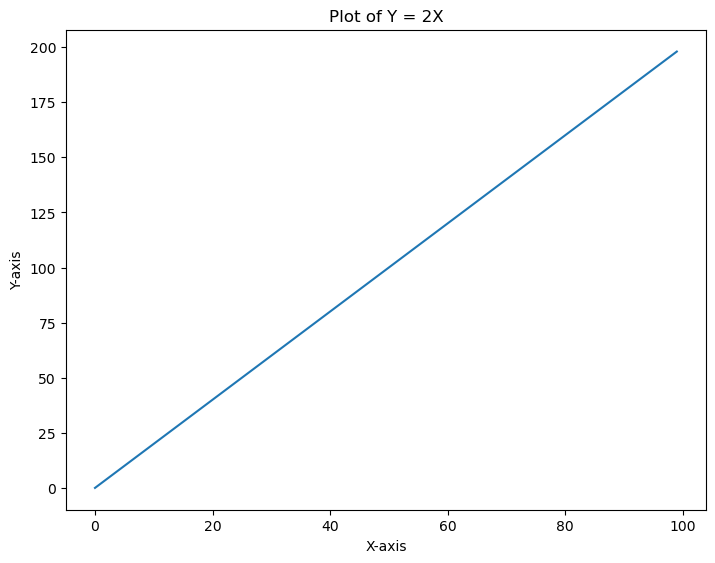

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 100)
y = x * 2
z = x ** 2

# Create a figure object
fig = plt.figure()

# Add an axis to the figure canvas at [0,0,1,1]
ax = fig.add_axes([0, 0, 1, 1])

# Plot (x, y) on the axis
ax.plot(x, y)

# Set labels and titles
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Y = 2X')

# Show the plot
plt.show()


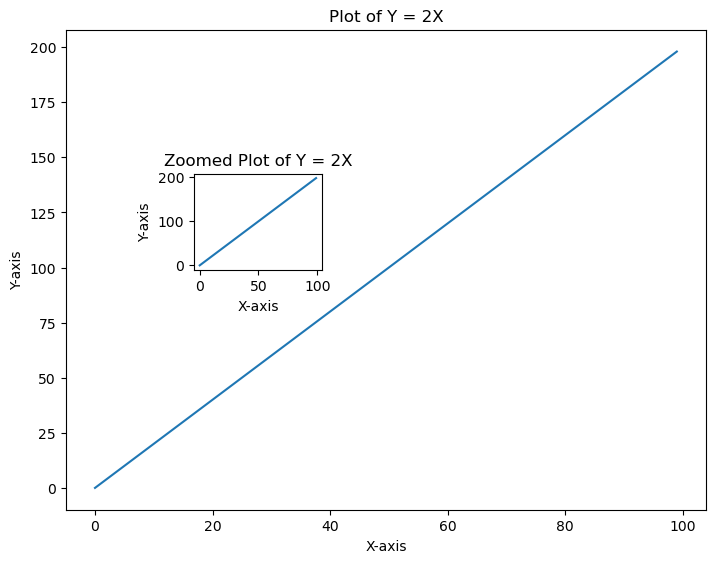

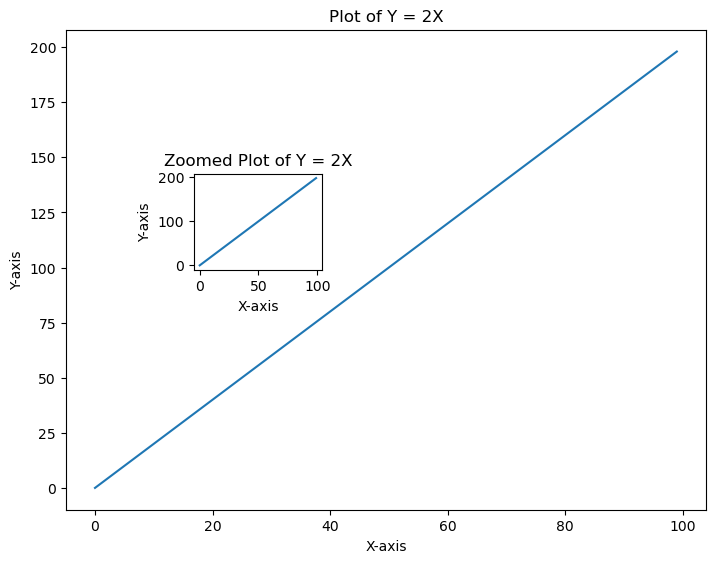

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 100)
y = x * 2
z = x ** 2

# Create a figure object
fig = plt.figure()

# Add the first axis at [0,0,1,1]
ax1 = fig.add_axes([0, 0, 1, 1])

# Add the second axis at [0.2,0.5,.2,.2]
ax2 = fig.add_axes([0.2, 0.5, 0.2, 0.2])

# Plot (x, y) on the first axis
ax1.plot(x, y)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_title('Plot of Y = 2X')

# Plot (x, y) on the second axis
ax2.plot(x, y)
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('Zoomed Plot of Y = 2X')

# Show the figure
fig


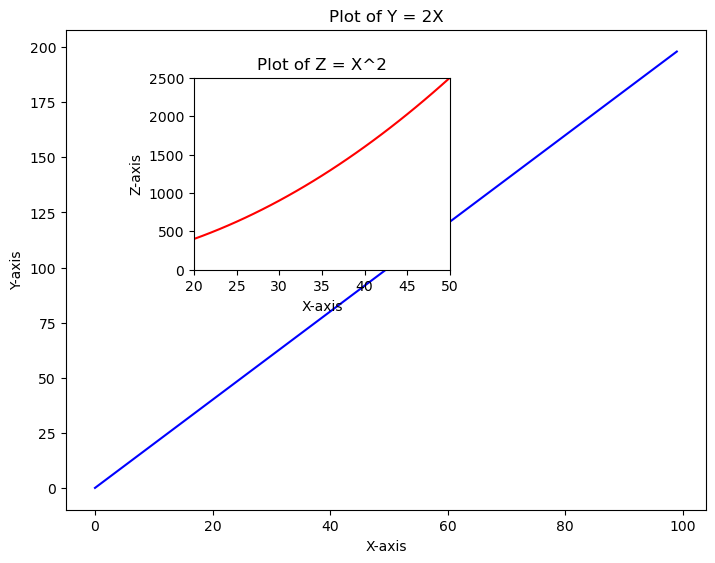

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 100)
y = x * 2
z = x ** 2

# Create a figure object
fig = plt.figure()

# Add the first axis at [0,0,1,1]
ax1 = fig.add_axes([0, 0, 1, 1])

# Add the second axis at [0.2,0.5,.4,.4]
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.4])

# Plot (x, y) on the first axis
ax1.plot(x, y, color='blue')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_title('Plot of Y = 2X')

# Plot (x, z) on the second axis
ax2.plot(x, z, color='red')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Z-axis')
ax2.set_title('Plot of Z = X^2')
ax2.set_xlim([20, 50])  # Set x-axis limits for the second plot
ax2.set_ylim([0, 2500])  # Set y-axis limits for the second plot

# Show the figure
plt.show()


In [4]:
my_list = [10, 20, 30, 40, 50]  # Creating a list with 5 elements

# 1. Deleting the first element
del my_list[0]

# 2. Adding 2 elements to the list
my_list.extend([60, 70])

# 3. Updating the 2nd element
my_list[1] = 25

# 4. Printing the list in sorted order
sorted_list = sorted(my_list)
print("Sorted list:", sorted_list)

# 5. Creating a set from the list and displaying it
my_set = set(my_list)
print("Set:", my_set)


Sorted list: [20, 25, 40, 50, 60, 70]
Set: {70, 40, 50, 20, 25, 60}


In [5]:
percentage = float(input("Enter the percentage of marks: "))

if percentage > 90:
    grade = "A"
elif percentage > 75:
    grade = "B"
elif percentage > 65:
    grade = "C"
elif percentage > 55:
    grade = "D"
else:
    grade = "E"

print("Grade:", grade)


Enter the percentage of marks: 66
Grade: C


In [6]:
limit = int(input("Enter the limit: "))

print("Odd numbers up to", limit, ":")
for num in range(1, limit + 1, 2):
    print(num)


Enter the limit: 23
Odd numbers up to 23 :
1
3
5
7
9
11
13
15
17
19
21
23


In [7]:
for i in range(1, 6):
    print(str(i) * i)


1
22
333
4444
55555


In [10]:
def print_marksheet(name, student_id, marks):
    print("Student Name:", name)
    print("Student ID:", student_id)
    print("------------------------------")
    print("Subject Marks:")
    for i in range(5):
        print("Subject", i+1, ":", marks[i])
    
    practical_marks = 50
    total_marks = sum(marks) + practical_marks
    average_marks = total_marks / 6
    
    print("------------------------------")
    print("Practical Marks:", practical_marks)
    print("Total Marks:", total_marks)
    print("Average Marks:", average_marks)

In [11]:
# Example usage
name = "John Doe"
student_id = "12345"
marks = [80, 75, 90, 85, 95]

print_marksheet(name, student_id, marks)

Student Name: John Doe
Student ID: 12345
------------------------------
Subject Marks:
Subject 1 : 80
Subject 2 : 75
Subject 3 : 90
Subject 4 : 85
Subject 5 : 95
------------------------------
Practical Marks: 50
Total Marks: 475
Average Marks: 79.16666666666667


In [12]:
class Student:
    def __init__(self, name, course, marks, rank):
        self.name = name
        self.course = course
        self.marks = marks
        self.rank = rank
    
    def display_details(self):
        print("Student Name:", self.name)
        print("Course:", self.course)
        print("Marks:", self.marks)
        print("Rank:", self.rank)
        print("--------------------------")

# Creating objects of the Student class
student1 = Student("John", "Engineering", 85, 1)
student2 = Student("Jane", "Medicine", 90, 2)
student3 = Student("Alex", "Business", 78, 3)

# Displaying attributes of the students
student1.display_details()
student2.display_details()
student3.display_details()


Student Name: John
Course: Engineering
Marks: 85
Rank: 1
--------------------------
Student Name: Jane
Course: Medicine
Marks: 90
Rank: 2
--------------------------
Student Name: Alex
Course: Business
Marks: 78
Rank: 3
--------------------------
